In [17]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [18]:
import sys
sys.path.insert(0, jaxqualin_path)

In [19]:
import postprocess
import plot
import QuasinormalMode
import spheroidal

from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *


2023-08-31 10:20:31.647405: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 10:20:32.685699: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 10:20:32.792140: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
from importlib import reload

In [21]:
reload(postprocess)
reload(plot)
reload(QuasinormalMode)
reload(spheroidal)
from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

In [24]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [23]:
FIT_SAVE_PATH = os.path.join(jaxqualin_path, "pickle/fits")
PLOT_PATH_ROOT = os.path.join(jaxqualin_path, f"plots/")
PLOT_PATH = os.path.join(jaxqualin_path, "paper_plots/")

In [6]:
SXSnum = "0305"
l = 2
m = 2

h, Mf, af, Level, retro = get_waveform_SXS(SXSnum, l, m)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


2023-04-06 19:14:08.428745: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-04-06 19:14:08.429829: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


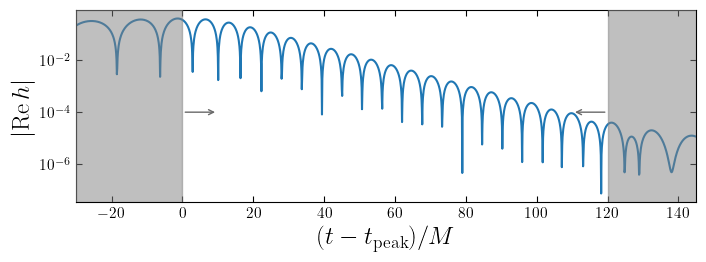

In [7]:
time, hplotr, hploti = h.postmerger(t0 = -30, t1 = 145)
fig, ax = plt.subplots(figsize = (8, 2.5))

ax.semilogy(time, np.abs(hplotr))
ax.axvspan(time[0], time[-1], color = 'white')
ax.axvspan(time[0], 0, alpha=0.5, color='grey', zorder = 100)
ax.axvspan(120, time[-1], alpha=0.5, color='grey', zorder = 100)

ax.annotate("", xy=(10, 1e-4), xytext=(0, 1e-4),
            arrowprops=dict(arrowstyle="->", color = 'dimgrey'))

ax.annotate("", xy=(110, 1e-4), xytext=(120, 1e-4),
            arrowprops=dict(arrowstyle="->", color = 'dimgrey'))

ax.set_xlim(time[0], time[-1])
ax.set_xlabel(r"$(t - t_{\rm peak})/M$")
ax.set_ylabel(r"$|{\rm Re} \, h|$")



plt.savefig(os.path.join(PLOT_PATH, f"waveform.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')

In [8]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = long_str_to_qnms("", Mf, af)
N_free = 5
nonconvergence_cut = False

N_fix = len(qnm_fixed_list)
run_string_prefix = f"SXS{SXSnum}_lm_{l}.{m}"

In [9]:
fitter = QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = N_free,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            run_string_prefix = run_string_prefix, random_initial = True,
                            initial_num = 10
                                  )

In [10]:
fitter.do_fits()

reloaded fit SXS0305_lm_2.2_N_5_t0_0.0000_50.0000_501 from an old run.


In [11]:
if N_fix > 0:
    _qnm_fixed_string_list = sorted(qnms_to_string(qnm_fixed_list))
    qnm_fixed_string_ordered = '_'.join(_qnm_fixed_string_list)
    run_string = f"{run_string_prefix}_N_{N_free}_fix_{qnm_fixed_string_ordered}_t0_{t0_arr[0]:.4f}_{t0_arr[-1]:.4f}_{len(t0_arr)}"
else:
    qnm_fixed_string_ordered = ''
    run_string = f"{run_string_prefix}_N_{N_free}_t0_{t0_arr[0]:.4f}_{t0_arr[-1]:.4f}_{len(t0_arr)}"
if nonconvergence_cut:
    run_string += "_nc"
file_path = os.path.join(
    FIT_SAVE_PATH, f"{run_string}_result.pickle")

In [12]:
file_path

'/home/mcheung1/Ringdown/jaxqualin/Jaxqualin/pickle/fits/SXS0305_lm_2.2_N_5_t0_0.0000_50.0000_501_result.pickle'

In [13]:
# check whether file_path is an existing file
if os.path.isfile(file_path):
    print("Loading existing file")
    with open(file_path, 'rb') as f:
        result = pickle.load(f)

Loading existing file


In [14]:
reload(postprocess)
reload(plot)
reload(QuasinormalMode)
reload(spheroidal)
from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


In [15]:
color_dict = {"2.2.0" : 'C0',
              "2.2.1" : 'C1',
              "3.2.0" : 'C2',
              "2.-2.0" : 'C3',
              "constant" : 'C4',
              "3.3.0": 'C5'}

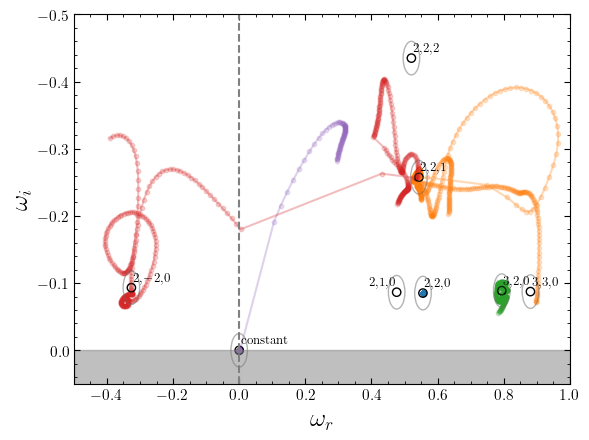

In [16]:
fig, ax = plt.subplots()

ax.axvspan(-10, 10, color = 'white')
plot_omega_free(result, scatter_size = 10, ax = ax, scatter_alpha = 0.2,
                color_indicate = True, color_indicate_list=[4,1,0,3,2])
ax.set_xlim(-0.5, 1.0)
ax.set_ylim(0.05, -0.5)
plot_predicted_qnms(ax, 
                    long_str_to_qnms("2.2.0_3.2.0_3.3.0_2.1.0_2.2.1_2.2.2_2.-2.0_constant", Mf, af),
                    ellipse_qnm_list=long_str_to_qnms("2.2.0_3.2.0_3.3.0_2.2.1_2.2.2_2.-2.0", Mf, af),
                    edgecolor = 'black',
                    ellipse_facecolor='none',
                    ellipse_edgecolor='dimgray',
                    change_lim=False,
                    label_offset=(0,0)
                    )

plt.savefig(os.path.join(PLOT_PATH, f"agnostic_fit.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')

In [17]:
qnm_fixed_list = long_str_to_qnms("2.2.0_3.2.0_2.2.1_2.-2.0_constant", Mf, af)
N_free = 0
fitter = QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = N_free,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            run_string_prefix = run_string_prefix, random_initial = False,
                            initial_num = 10
                                  )

In [18]:
fitter.do_fits()

reloaded fit SXS0305_lm_2.2_N_0_fix_2.-2.0_2.2.0_2.2.1_3.2.0_constant_t0_0.0000_50.0000_501 from an old run.


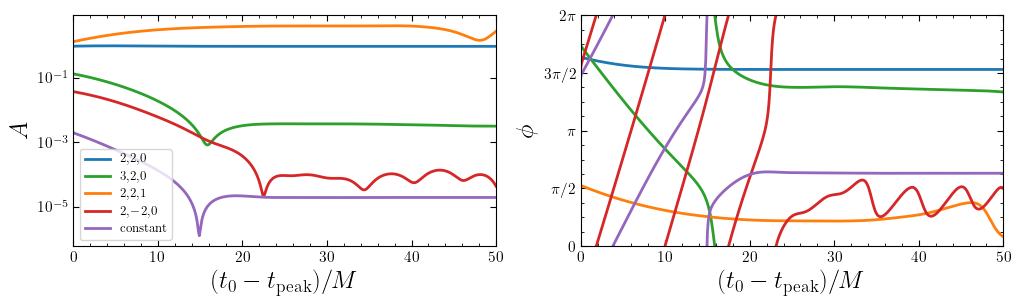

In [19]:
fig, axs = plt.subplots(1,2, figsize = (12, 3))

axs[0].axvspan(-10, 60, color = 'white')
axs[1].axvspan(-10, 60, color = 'white')
result = fitter.result_full
plot_amplitudes(result, fixed_modes = qnm_fixed_list, ax = axs[0], legend = True, color_dict = color_dict)
plot_phases(result, fixed_modes = qnm_fixed_list, ax = axs[1], legend = False, color_dict = color_dict)

axs[0].legend(fontsize = 9)

plt.savefig(os.path.join(PLOT_PATH, f"fixed_fit_1.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')

In [20]:
qnm_fixed_list = long_str_to_qnms("2.2.0_3.2.0_2.2.1_constant", Mf, af)
N_free = 0
fitter = QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = N_free,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            run_string_prefix = run_string_prefix, random_initial = False,
                            initial_num = 10
                                  )

In [21]:
fitter.do_fits()

reloaded fit SXS0305_lm_2.2_N_0_fix_2.2.0_2.2.1_3.2.0_constant_t0_0.0000_50.0000_501 from an old run.


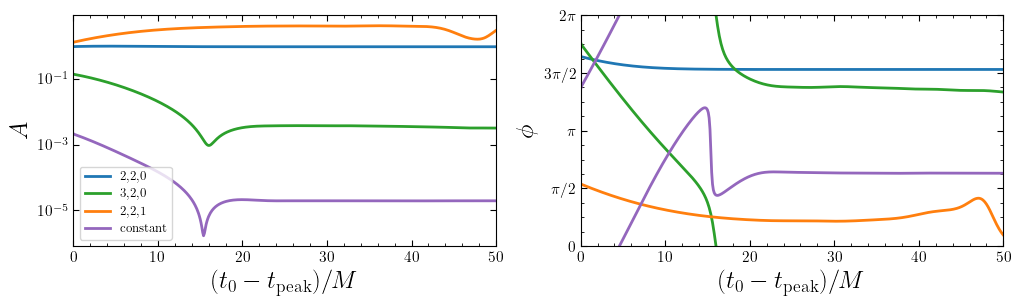

In [22]:
fig, axs = plt.subplots(1,2, figsize = (12, 3))
axs[0].axvspan(-10, 60, color = 'white')
axs[1].axvspan(-10, 60, color = 'white')

result = fitter.result_full
plot_amplitudes(result, fixed_modes = qnm_fixed_list, ax = axs[0], color_dict = color_dict, legend = True)
plot_phases(result, fixed_modes = qnm_fixed_list, ax = axs[1], color_dict = color_dict, legend = False)

axs[0].legend(fontsize = 9)

plt.savefig(os.path.join(PLOT_PATH, f"fixed_fit_2.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')

In [23]:
qnm_fixed_list = long_str_to_qnms("2.2.0_3.2.0_2.2.1_2.-2.0_3.3.0_constant", Mf, af)
N_free = 0
fitter = QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = N_free,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            run_string_prefix = run_string_prefix, random_initial = False,
                            initial_num = 10
                                  )

In [24]:
fitter.do_fits()

reloaded fit SXS0305_lm_2.2_N_0_fix_2.-2.0_2.2.0_2.2.1_3.2.0_3.3.0_constant_t0_0.0000_50.0000_501 from an old run.


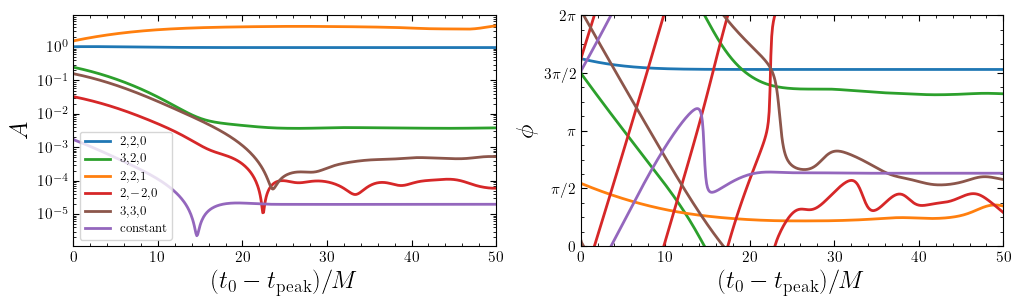

In [25]:
fig, axs = plt.subplots(1,2, figsize = (12, 3))
axs[0].axvspan(-10, 60, color = 'white')
axs[1].axvspan(-10, 60, color = 'white')

result = fitter.result_full
plot_amplitudes(result, fixed_modes = qnm_fixed_list, ax = axs[0], color_dict = color_dict, legend = True)
plot_phases(result, fixed_modes = qnm_fixed_list, ax = axs[1], color_dict = color_dict, legend = False)

axs[0].legend(fontsize = 9)

plt.savefig(os.path.join(PLOT_PATH, f"fixed_fit_3.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')

In [26]:
N_fix = len(qnm_fixed_list)
flat_length = 100

mode_strings = ['2.2.0', '2.2.1', '3.2.0', '2.-2.0', 'constant', '3.3.0']
bold_dict = {}
for i in range(N_fix):
    A_arr = result.A_fix_dict[f'A_{mode_strings[i]}']
    phi_arr = result.phi_fix_dict[f'phi_{mode_strings[i]}']
    fluc_least_indx, _ = flattest_region_quadrature(
                        flat_length,
                        A_arr, phi_arr,
                        quantile_range = 0.95,
                        med_min = 1e-3,
                        weight_1 = 1, weight_2 = 1.5)
    bold_dict[mode_strings[i]] = (fluc_least_indx, fluc_least_indx + flat_length)

In [27]:
bold_dict

{'2.2.0': (365, 465),
 '2.2.1': (216, 316),
 '3.2.0': (377, 477),
 '2.-2.0': (357, 457),
 'constant': (400, 500),
 '3.3.0': (379, 479)}

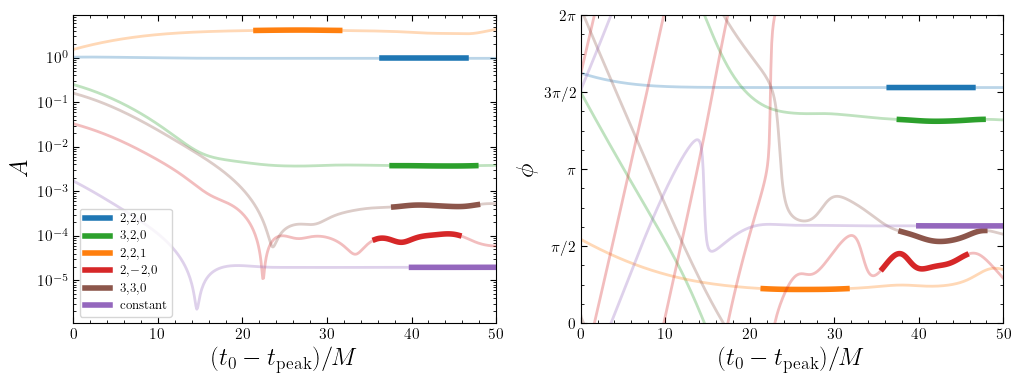

In [28]:
fig, axs = plt.subplots(1,2, figsize = (12, 4))
axs[0].axvspan(-10, 60, color = 'white')
axs[1].axvspan(-10, 60, color = 'white')

plot_amplitudes(result, fixed_modes = qnm_fixed_list, ax = axs[0], color_dict = color_dict, use_label = False, legend = True, bold_dict = bold_dict, alpha = 0.3)
plot_phases(result, fixed_modes = qnm_fixed_list, ax = axs[1], color_dict = color_dict, legend = False, bold_dict = bold_dict, alpha = 0.3)

axs[0].legend(fontsize = 9)

plt.savefig(os.path.join(PLOT_PATH, f"fixed_fit_flat.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')

In [41]:
t_start_dict = {'2.2.1': 9.8,
 '3.3.0': 33.1,
 '3.2.0': 20.3,
 '2.-2.0': 32.2,
 'constant': 14.5,
 '2.2.0': 0.0}

for key in t_start_dict:
    t_start_dict[key] += 0.5

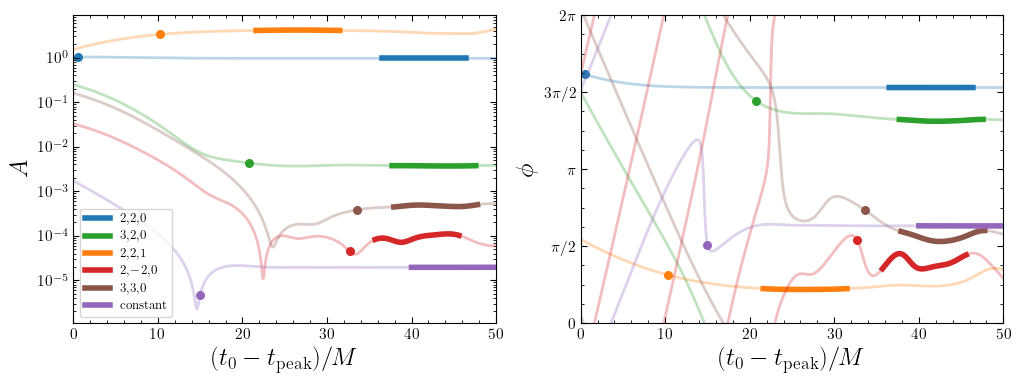

In [45]:
fig, axs = plt.subplots(1,2, figsize = (12, 4))
axs[0].axvspan(-10, 60, color = 'white')
axs[1].axvspan(-10, 60, color = 'white')

plot_amplitudes(result, fixed_modes = qnm_fixed_list, ax = axs[0], 
                color_dict = color_dict, use_label = False, 
                legend = True, bold_dict = bold_dict, alpha = 0.3,
                t_flat_start_dict = t_start_dict, flat_start_s = 30)
plot_phases(result, fixed_modes = qnm_fixed_list, ax = axs[1], 
            color_dict = color_dict, legend = False, bold_dict = bold_dict, 
            alpha = 0.3, t_flat_start_dict = t_start_dict, flat_start_s = 30)

axs[0].legend(fontsize = 9)

plt.savefig(os.path.join(PLOT_PATH, f"fixed_fit_flat.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')